# IMT01306601 - Machine Learning

---

## Assessment For Learning 3

**By : Nathanael Abel Arianto - 0706012010029**


### Import Library


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

### Load Dataset


In [3]:
df = pd.read_excel("dataiklim.xlsx")
df.head()

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,01-01-2020,26.2,32.6,28.7,79,8888.0,4.6,5,270,2,W
1,02-01-2020,25.4,34.2,28.9,78,1.3,0.3,7,300,3,W
2,03-01-2020,26.0,34.2,28.6,81,0.0,4.0,6,280,3,NW
3,04-01-2020,26.2,32.3,28.3,82,1.8,4.9,6,300,3,NW
4,05-01-2020,26.5,35.1,28.6,81,1.3,0.2,11,310,3,NW


In [4]:
# Informasi dari kolom pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tanggal  717 non-null    object 
 1   Tn       715 non-null    float64
 2   Tx       717 non-null    float64
 3   Tavg     717 non-null    float64
 4   RH_avg   717 non-null    int64  
 5   RR       632 non-null    float64
 6   ss       717 non-null    float64
 7   ff_x     717 non-null    int64  
 8   ddd_x    717 non-null    int64  
 9   ff_avg   717 non-null    int64  
 10  ddd_car  717 non-null    object 
dtypes: float64(5), int64(4), object(2)
memory usage: 61.7+ KB


In [5]:
# deskripsi dari masing-masing kolom pada data
df.describe()

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg
count,715.000000,717.000000,717.000000,717.000000,632.000000,717.000000,717.000000,717.000000,717.000000
mean,25.616364,33.926918,28.854114,77.524407,611.389241,19.985356,5.220363,180.966527,2.199442
std,0.959472,1.303225,0.959574,5.644350,2238.109168,373.202560,1.709807,98.234123,0.662735
min,22.000000,27.600000,26.000000,59.000000,0.000000,0.000000,2.000000,3.000000,1.000000
25%,25.000000,33.200000,28.300000,73.000000,0.000000,4.300000,4.000000,120.000000,2.000000
50%,25.600000,34.000000,28.900000,78.000000,0.250000,6.700000,5.000000,150.000000,2.000000
75%,26.200000,34.800000,29.500000,82.000000,12.275000,8.300000,6.000000,290.000000,3.000000
max,28.000000,37.500000,31.700000,93.000000,8888.000000,9999.000000,21.000000,360.000000,4.000000


In [6]:
# drop kolom Tanggal karena tidak memiliki korelasi dengan data lainnya
df = df.drop(["Tanggal"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tn       715 non-null    float64
 1   Tx       717 non-null    float64
 2   Tavg     717 non-null    float64
 3   RH_avg   717 non-null    int64  
 4   RR       632 non-null    float64
 5   ss       717 non-null    float64
 6   ff_x     717 non-null    int64  
 7   ddd_x    717 non-null    int64  
 8   ff_avg   717 non-null    int64  
 9   ddd_car  717 non-null    object 
dtypes: float64(5), int64(4), object(1)
memory usage: 56.1+ KB


Keterangan:

- 8888: data tidak terukur
- 9999: Tidak Ada Data (tidak dilakukan pengukuran)
- "Tn: Temperatur minimum (°C)"
- Tx: Temperatur maksimum (°C)
- Tavg: Temperatur rata-rata (°C)
- RH_avg: Kelembapan rata-rata (%)
- RR: Curah hujan (mm)
- ss: Lamanya penyinaran matahari (jam)
- ff_x: Kecepatan angin maksimum (m/s)
- ddd_x: Arah angin saat kecepatan maksimum (°)
- ff_avg: Kecepatan angin rata-rata (m/s)
- ddd_car: Arah angin terbanyak (°)


In [7]:
# mengecek kolom yang memiliki missing value
print('Columns with missing value:')
print(df.isnull().sum())

Columns with missing value:
Tn          2
Tx          0
Tavg        0
RH_avg      0
RR         85
ss          0
ff_x        0
ddd_x       0
ff_avg      0
ddd_car     0
dtype: int64


In [8]:
# mengubah tipe data arah angin dari float ke string
df["ddd_car"] = df["ddd_car"].astype("string")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tn       715 non-null    float64
 1   Tx       717 non-null    float64
 2   Tavg     717 non-null    float64
 3   RH_avg   717 non-null    int64  
 4   RR       632 non-null    float64
 5   ss       717 non-null    float64
 6   ff_x     717 non-null    int64  
 7   ddd_x    717 non-null    int64  
 8   ff_avg   717 non-null    int64  
 9   ddd_car  717 non-null    string 
dtypes: float64(5), int64(4), string(1)
memory usage: 56.1 KB


In [9]:
# drop NaN values
df = df.dropna()
df = df[df["RR"] != 8888]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587 entries, 1 to 716
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tn       587 non-null    float64
 1   Tx       587 non-null    float64
 2   Tavg     587 non-null    float64
 3   RH_avg   587 non-null    int64  
 4   RR       587 non-null    float64
 5   ss       587 non-null    float64
 6   ff_x     587 non-null    int64  
 7   ddd_x    587 non-null    int64  
 8   ff_avg   587 non-null    int64  
 9   ddd_car  587 non-null    string 
dtypes: float64(5), int64(4), string(1)
memory usage: 50.4 KB


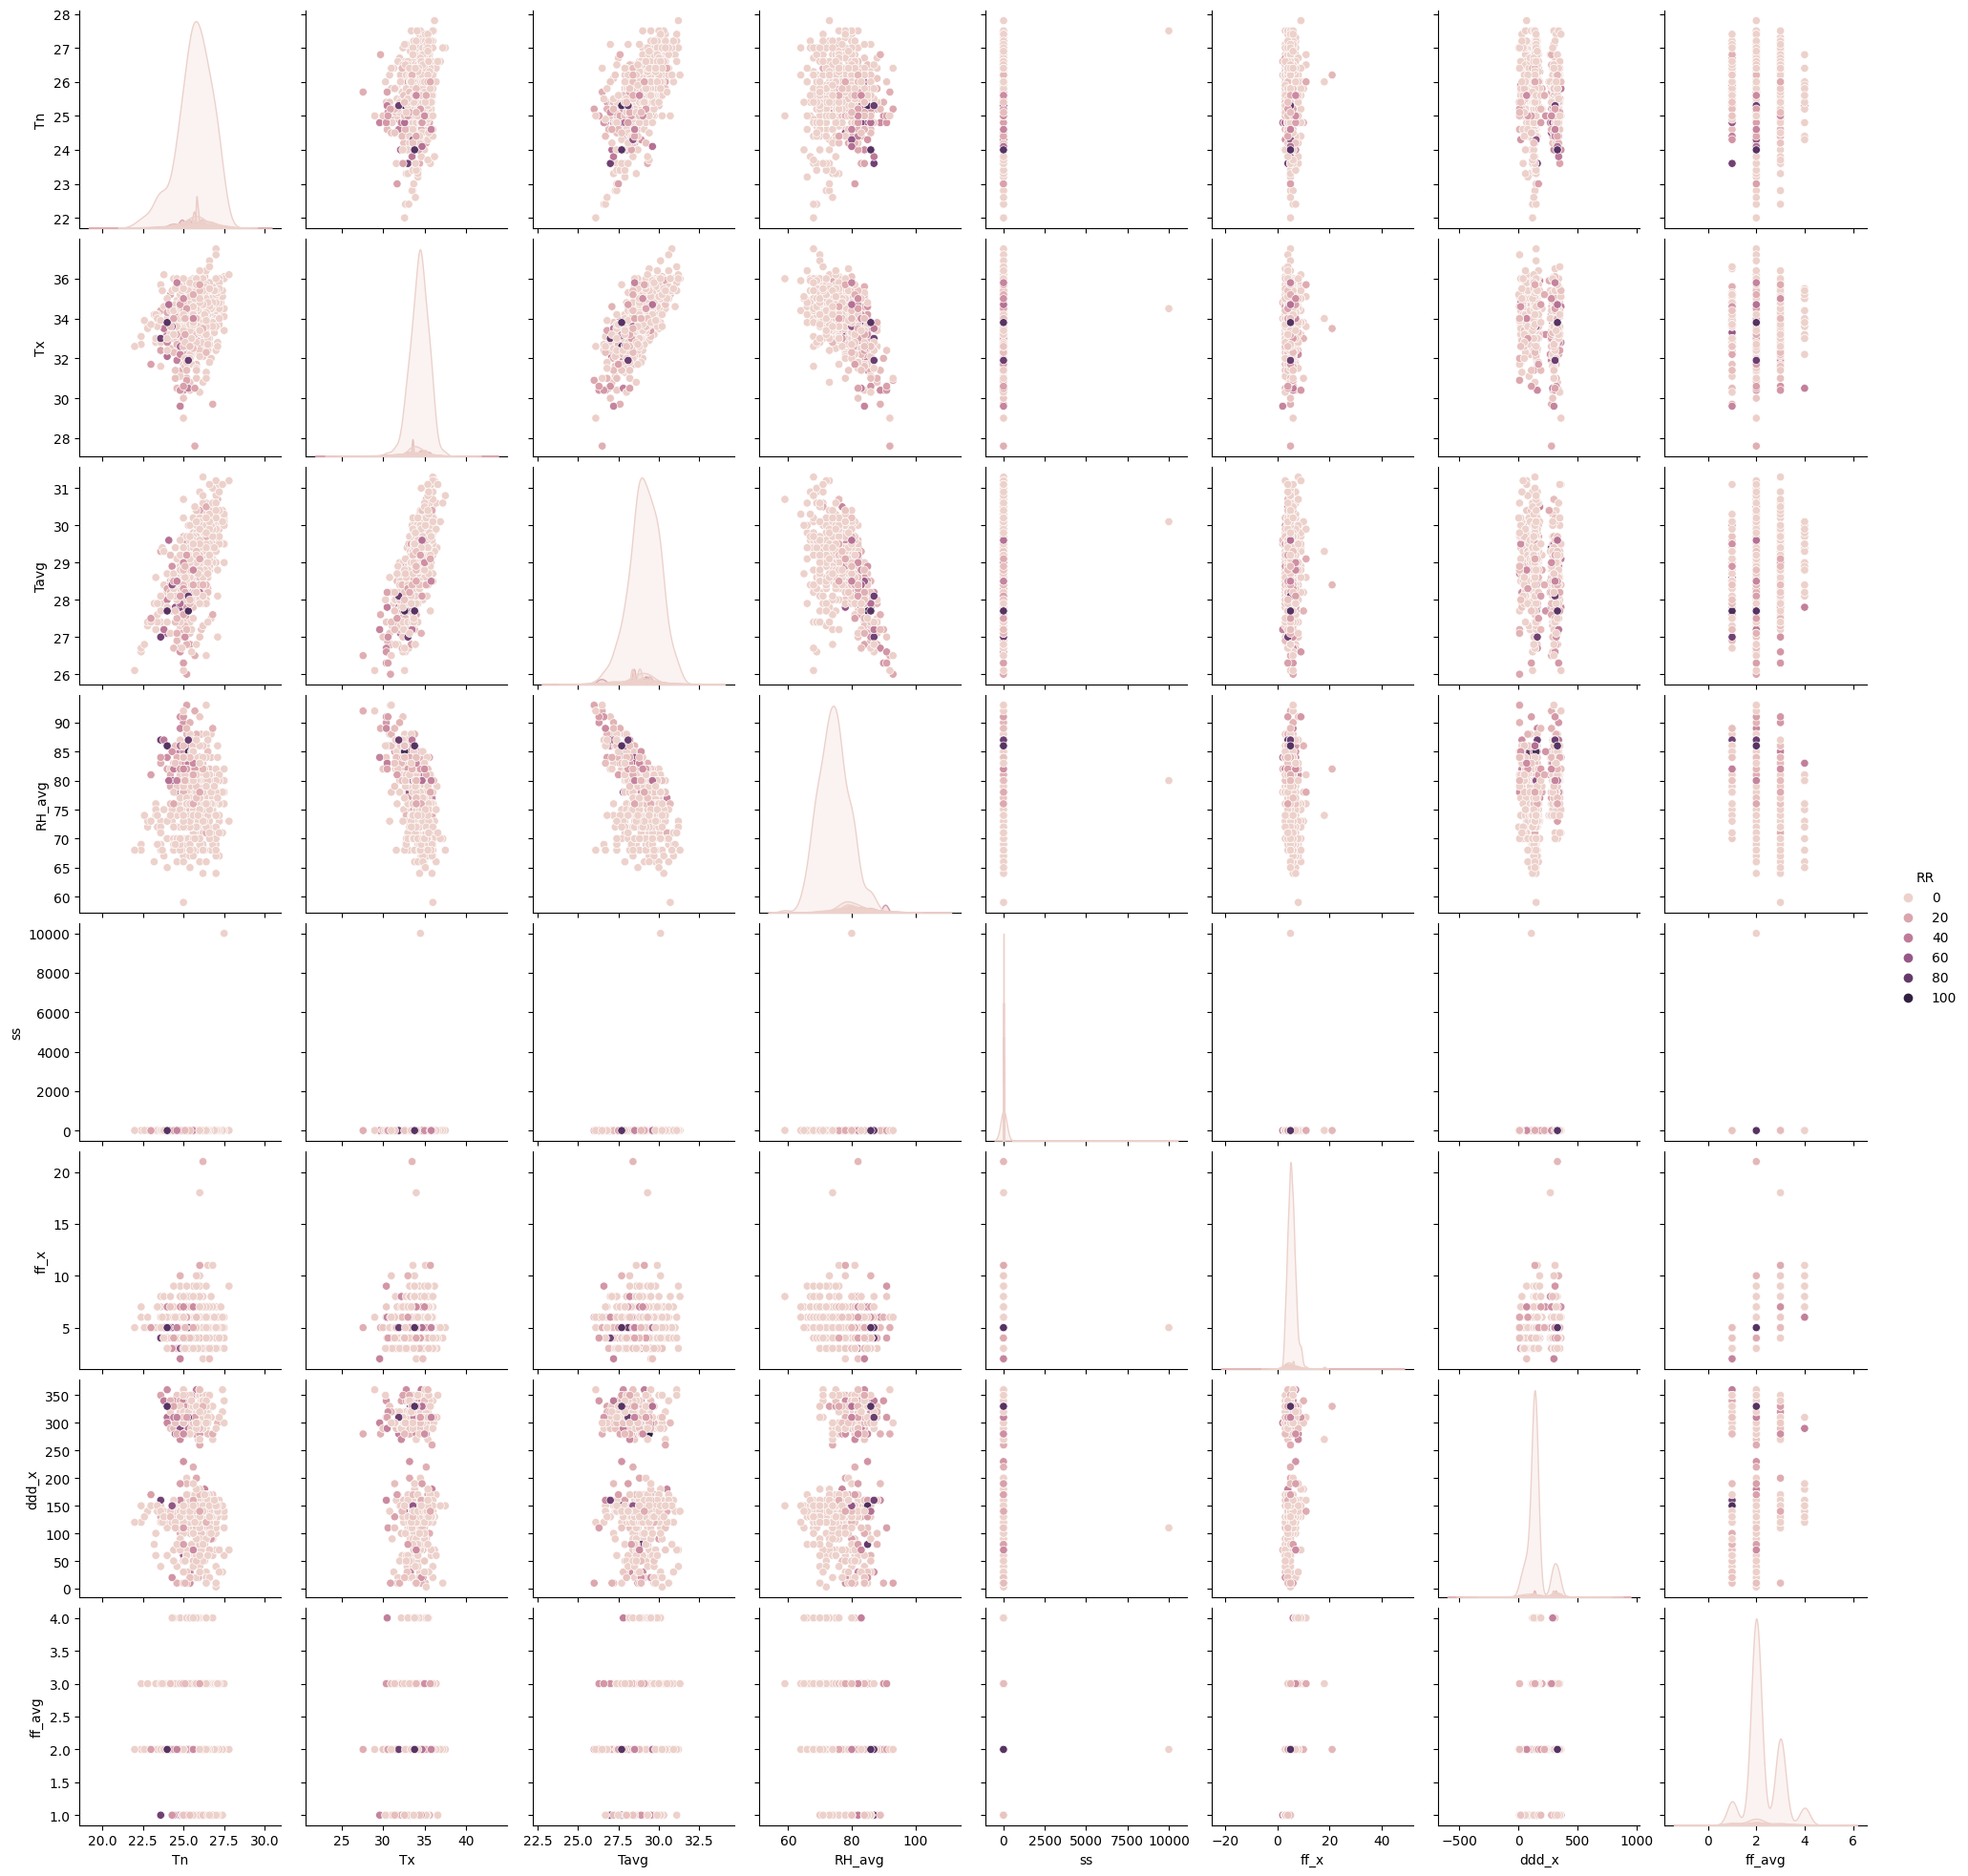

In [10]:
# Alternatif: Seaborn pairplot untuk memunculkan penyebaran data
sns.pairplot(data=df, hue="RR")
plt.show()

In [11]:
print(df["ddd_car"].value_counts())

SE    234
NW    125
C      54
W      43
S      42
E      41
N      38
NE     10
Name: ddd_car, dtype: Int64


In [12]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df["ddd_car"] = label.fit_transform(df["ddd_car"])

print(df["ddd_car"].value_counts())

6    234
4    125
0     54
7     43
5     42
1     41
2     38
3     10
Name: ddd_car, dtype: int64


In [13]:
# memisahkan dataset menjadi x dan y menggunakan loc
X, y = df.loc[:, df.columns != 'RR'], df.loc[:, 'RR']

In [14]:
# change "RR" column values to 0 and 1
# 0 means not raining while 1 means the otherwise
df.loc[(df["RR"] < 0.5), "RR"] = 0
df.loc[(df["RR"] >= 0.5), "RR"] = 1
df["RR"].value_counts()

0.0    323
1.0    264
Name: RR, dtype: int64

### Pre-processing Data


In [15]:
# Normalisasi data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))
X_scaled.head()

,0,1,2,3,4,5,6,7,8
0,0.586207,0.666667,0.547170,0.558824,0.00003,0.263158,0.831933,0.666667,1.000000
1,0.689655,0.666667,0.490566,0.647059,0.00040,0.210526,0.775910,0.666667,0.571429
2,0.724138,0.474747,0.433962,0.676471,0.00049,0.210526,0.831933,0.666667,0.571429
3,0.775862,0.757576,0.490566,0.647059,0.00002,0.473684,0.859944,0.666667,0.571429
4,0.379310,0.767677,0.471698,0.588235,0.00045,0.157895,0.859944,0.333333,0.571429


In [16]:
# setelah dataset dibagi menjadi x = atribut dan y = class kemudian dipisahkan menjadi data training dan testing menggunakan train_test_split()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=32)

### Learning Process


#### K-Nearest Neighbours


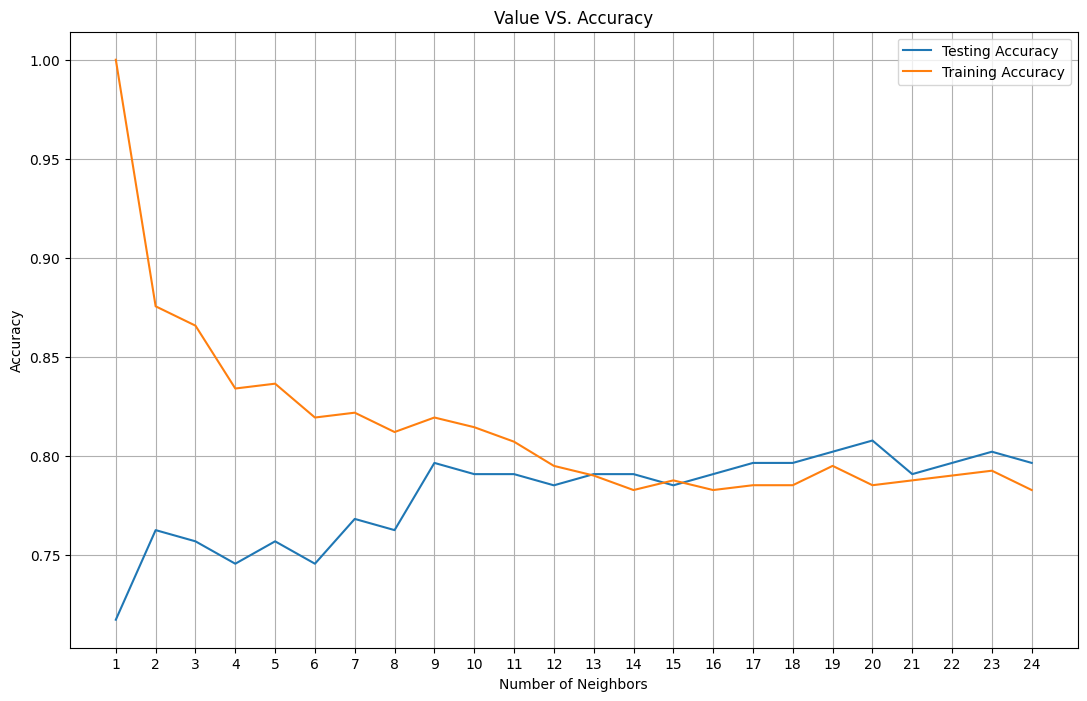

Best Accuracy is 0.807909604519774 with K = 20


In [17]:
from sklearn.neighbors import KNeighborsClassifier
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

# Loop over different values of k
for i, k in enumerate(neig):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy.append(knn.score(X_train, y_train))
    
    # Compute accuracy on the testing set
    test_accuracy.append(knn.score(X_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Value VS. Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.grid()
plt.show()
print('Best Accuracy is {} with K = {}'.format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [18]:
# pilih K terbaik dari data percobaan di atas (K = 20)
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [19]:
# print akurasi dari data testing menggunakan score
print('KNN (X = 20) Accuracy: ', knn.score(X_test, y_test))

KNN (X = 20) Accuracy:  0.807909604519774


<AxesSubplot: >

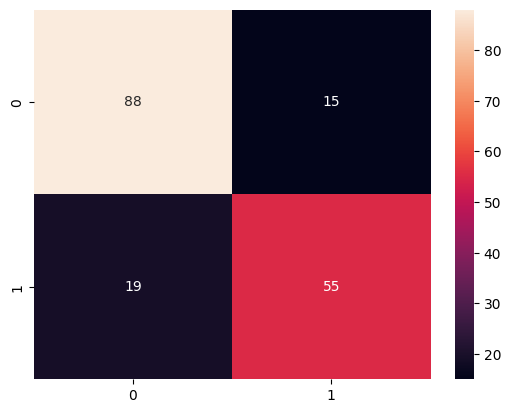

In [20]:
# visualisasi untuk confusion matrix
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True)

In [21]:
# Model Evaluation
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=df['RR'].astype(str).value_counts().index))

              precision    recall  f1-score   support

         0.0       0.82      0.85      0.84       103
         1.0       0.79      0.74      0.76        74

    accuracy                           0.81       177
   macro avg       0.80      0.80      0.80       177
weighted avg       0.81      0.81      0.81       177



#### Gaussian Naïve Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB
# model menggunakan Gaussian Naive Bayes
gnb = GaussianNB()

# training dengan dataset train
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [23]:
# Parameter Tuning for GNB to improve Accuracy
# Reference: https://www.analyticsvidhya.com/blog/2021/01/gaussian-naive-bayes-with-hyperpameter-tuning/

from sklearn.model_selection import RepeatedStratifiedKFold
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)

In [24]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=gnb, param_grid=params_NB, cv=cv_method,verbose=1,scoring='accuracy')
Data_transformed = PowerTransformer().fit_transform(X_test)
gs_NB.fit(Data_transformed, y_test);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [25]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

In [26]:
from sklearn.metrics import accuracy_score
# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)
# akurasi dari data testing
accuracy_test = accuracy_score(y_test,predict_test)
print('GNB Accuracy: : ', accuracy_test)

GNB Accuracy: :  0.8192090395480226


<AxesSubplot: >

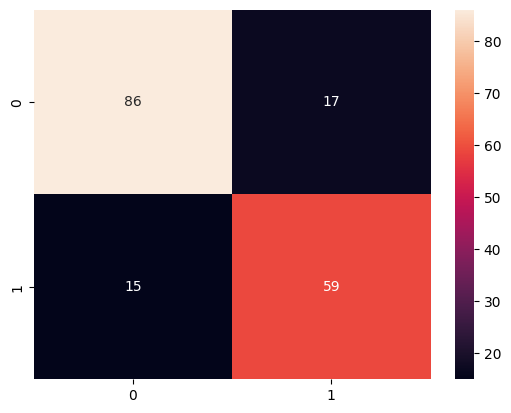

In [27]:
# visualisasi untuk confusion matrix
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test, predict_test)
sns.heatmap(conf, annot=True)

In [28]:
# Model Evaluation
from sklearn.metrics import classification_report

print(classification_report(y_test, predict_test, target_names=df['RR'].astype(str).value_counts().index))

              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84       103
         1.0       0.78      0.80      0.79        74

    accuracy                           0.82       177
   macro avg       0.81      0.82      0.81       177
weighted avg       0.82      0.82      0.82       177



#### Support Vector Machine


In [29]:
from sklearn.svm import SVC
# model menggunakan Support Vector Machine
svc = SVC(kernel='rbf')

# training dengan dataset train
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [30]:
# Parameter Tuning for SVM
# Reference: https://www.aifinesse.com/svm/support-vector-machine-tuning/

from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            'kernel': ['rbf']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.720 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.817 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.793 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.817 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.707 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.537 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.537 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.537 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.537 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.537 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.537 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [31]:
# print parameter terbaik setelah selesai tuning
print(grid.best_params_)
print('')

# print model setelah hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

SVC(C=10, gamma=0.1)


In [32]:
grid_predictions = grid.predict(X_test)

print('SVC Accuracy', grid.score(X_test, y_test))

SVC Accuracy 0.807909604519774


<AxesSubplot: >

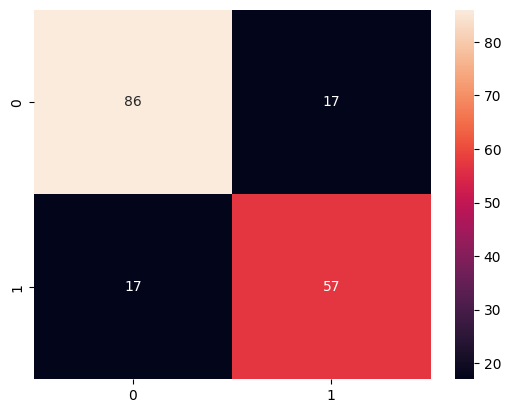

In [33]:
# visualisasi untuk confusion matrix
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test, grid_predictions)
sns.heatmap(conf, annot=True)

In [34]:
# Model Evaluation
from sklearn.metrics import classification_report

print(classification_report(y_test, grid_predictions, target_names=df['RR'].astype(str).value_counts().index))

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83       103
         1.0       0.77      0.77      0.77        74

    accuracy                           0.81       177
   macro avg       0.80      0.80      0.80       177
weighted avg       0.81      0.81      0.81       177



#### Decision Tree

In [35]:
from sklearn import tree
# model menggunakan Decision Tree
dtree = tree.DecisionTreeClassifier()

# training dengan dataset train
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

In [36]:
param_dict = {
    "criterion": ["gini", "entropy"],
    "max_depth": range(1, 10),
    "min_samples_split": range(1, 10),
    "min_samples_leaf": range(1, 5),
}

In [37]:
# Parameter Tuning for Decision Tree with GridSearchCV
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(dtree, param_dict, cv=10, scoring="accuracy", n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


c:\Users\natha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
720 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\natha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\natha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "c:\Users\natha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.p

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             scoring='accuracy', verbose=1)

In [38]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 3}

In [39]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=3,
                       min_samples_split=3)

In [40]:
grid.best_score_

0.802439024390244

In [41]:
# print akurasi dari data testing menggunakan grid score
print('Decision Tree Accuracy: ', grid.score(X_test, y_test))

Decision Tree Accuracy:  0.7570621468926554


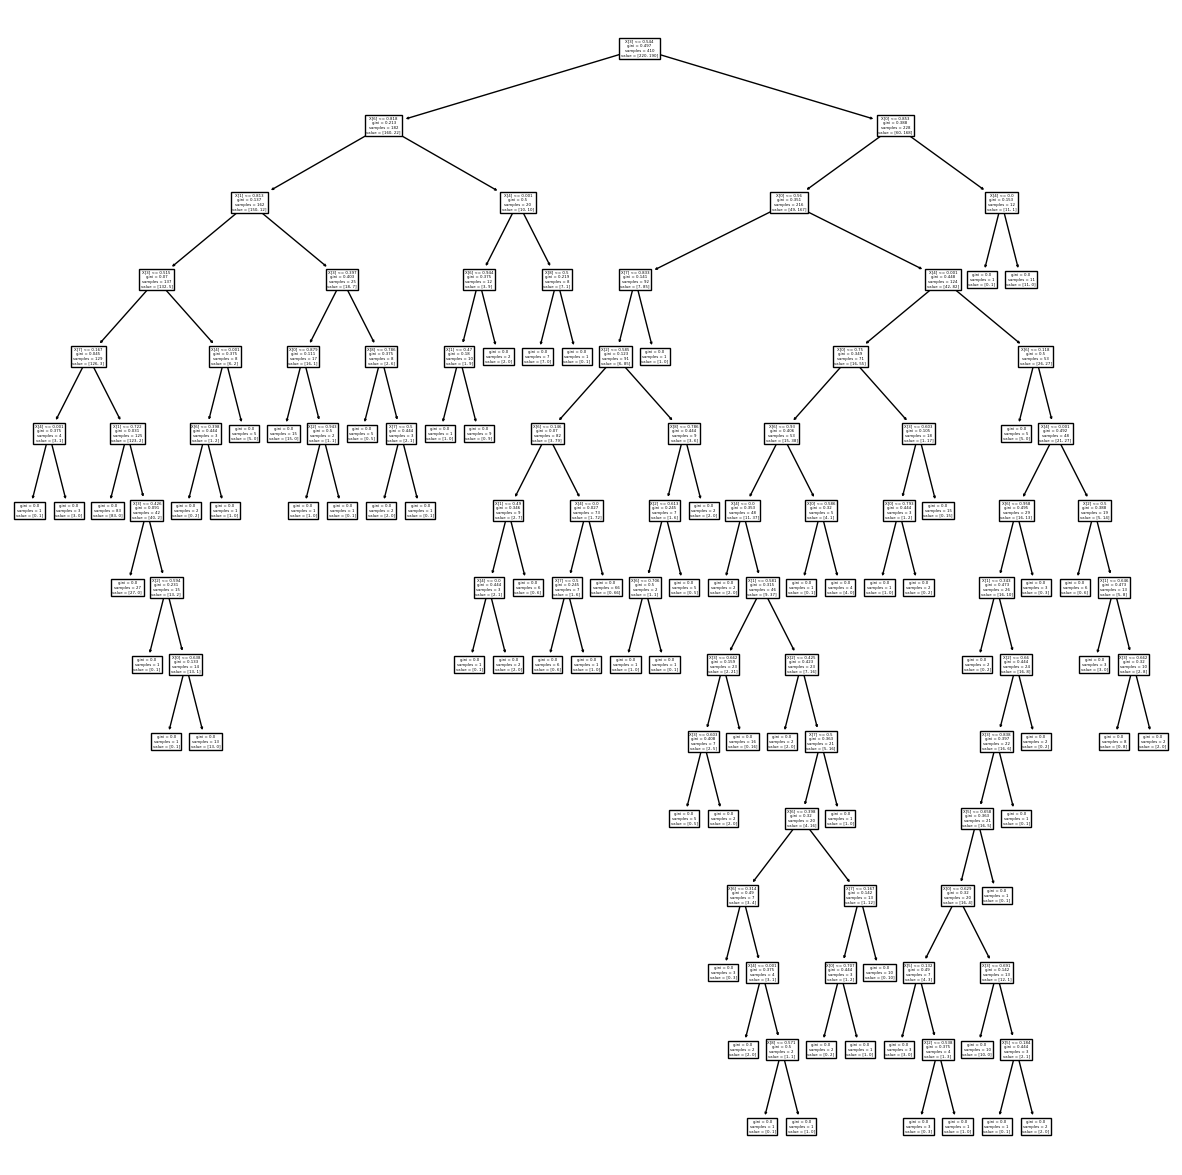

In [42]:
# menampilkan tree hasil training
plt.figure(figsize=(15,15))
tree.plot_tree(dtree) 
plt.show()

<AxesSubplot: >

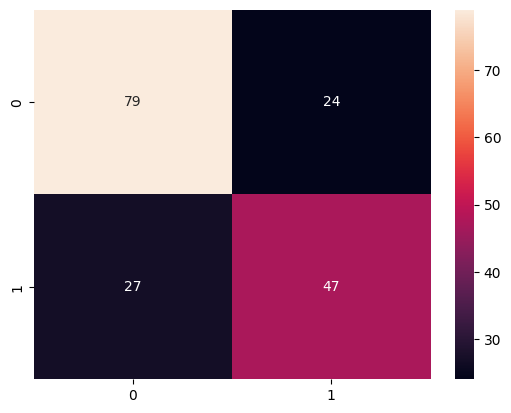

In [43]:
# visualisasi untuk confusion matrix
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True)

In [44]:
# Model Evaluation
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=df['RR'].astype(str).value_counts().index))

              precision    recall  f1-score   support

         0.0       0.75      0.77      0.76       103
         1.0       0.66      0.64      0.65        74

    accuracy                           0.71       177
   macro avg       0.70      0.70      0.70       177
weighted avg       0.71      0.71      0.71       177



#### Random Forest

In [45]:
# prediksi dengan Random Forest
from sklearn.ensemble import RandomForestClassifier

randforest = RandomForestClassifier()

# training dengan dataset train
randforest.fit(X_train, y_train)
y_pred = randforest.predict(X_test)

In [46]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [47]:
# Parameter Tuning for Random Forest with GridSearchCV
CV_rfc = GridSearchCV(estimator=randforest, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

c:\Users\natha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\natha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\natha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [48]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 200}

In [49]:
rfc =RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)

c:\Users\natha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [50]:
# akurasi dari data testing
print('Random Forest Accuracy: ', rfc.score(X_test, y_test))

Random Forest Accuracy:  0.7740112994350282


<AxesSubplot: >

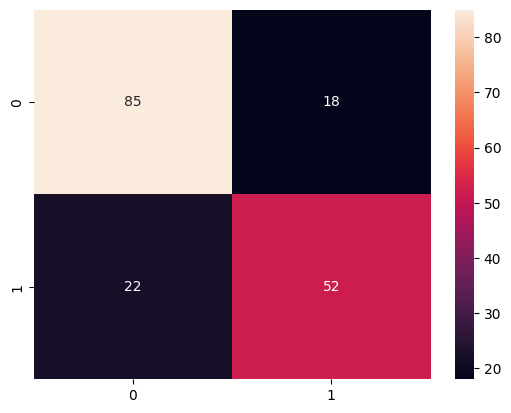

In [51]:
# visualisasi untuk confusion matrix
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test, pred)
sns.heatmap(conf, annot=True)

In [52]:
# Model Evaluation
from sklearn.metrics import classification_report

print(classification_report(y_test, pred, target_names=df['RR'].astype(str).value_counts().index))

              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81       103
         1.0       0.74      0.70      0.72        74

    accuracy                           0.77       177
   macro avg       0.77      0.76      0.77       177
weighted avg       0.77      0.77      0.77       177

